In [1]:
###Import
import sys

#import geobayes_simple as gs
from matplotlib import pyplot as plt
from IPython.core.display import Image

%matplotlib inline
import pymc as pm
from pymc.Matplot import plot
import numpy as np
from IPython.core.pylabtools import figsize
figsize(15, 6)
import seaborn
seaborn.set_context(font_scale=2)
seaborn.set_style("white")

from pymc import graph

import scipy.optimize as sop
import scipy.stats as stats
import matplotlib.mlab as mlab

from scipy.signal import argrelextrema

In [2]:
fault_block = np.load('block_faults.npy') #1=hanging wall; 0=footwall
lith_block = np.load('block_lith.npy')
non_res = np.load('Non_res.npy')
res = np.load('res.npy')
#res = np.load('res.npy').astype(int)
seal = np.load('seal.npy')
res2 = np.load('sec_res.npy')

In [3]:
counter = 0

#to save z values in slices in
#yvals = [np.arange(0,50,1)]
#zvals = [np.arange(0,50,1)]
xvals = []
yvals = []
zvals = []
all_min = np.empty([3,], dtype=int)
print(all_min)

#array to save local mini in
#mins = []
#print(mins)

while counter < 50:
    for e in res:
        #print(e)
        if e[1] == counter:
            xvals.append(e[0])
            yvals.append(e[1])
            zvals.append(e[2])
          
    zvals = np.array(zvals)
    min_pos = argrelextrema(zvals, np.less, order=10)
    yvals = np.array(yvals)
    xvals = np.array(xvals)
    ypos = yvals[min_pos]
    xpos = xvals[min_pos]
    mins = zvals[min_pos]
    
    np.append(all_min, mins)
    #print(xpos)
    #print(ypos)
    #print(mins)
    mins_pos = np.array(list(zip(xpos, ypos, mins)))
    #print(mins_pos)
    maxmin_pos = np.argmax(mins)
    #print(maxmin_pos)
    maxmin = (mins_pos[maxmin_pos,:])
    #print(maxmin)
    #print()
    all_min = np.vstack((all_min, mins_pos))
    #print(all_min)
    #print()
    #xy_vals = zip(yvals, zvals)
    #print(xy_vals)
    xvals = []
    yvals = []
    zvals = []

    counter += 1
    
all_min = np.delete(all_min, 0, 0)

[                  0 4607182418800017408 4611686018427387904]


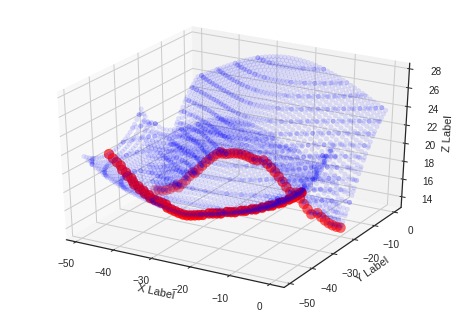

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
#ax.scatter(non_res[:,0], non_res[:,1], non_res[:,2], c='g')
ax.scatter(-all_min[:,1], -all_min[:,0], all_min[:,2], c='r', s = 100)
# ax.scatter(all_min[:,0], all_min[:,1], all_min[:,2], c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
near_fault_thresh = all_min[:,0] < 30 #taking only relevant side by setting a threshold visually estimated, best: 20
leak_line = all_min[near_fault_thresh]

In [6]:
leak_pos = np.array(np.argmax(leak_line[:,2]))
leak_z = np.take(leak_line[:,2], leak_pos)

leak_p = np.array([np.take(leak_line[:,1], leak_pos), np.take(leak_line[:,0], leak_pos), np.take(leak_line[:,2], leak_pos)])

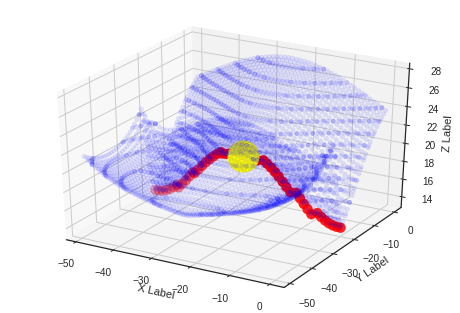

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
#ax.scatter(non_res[:,0], non_res[:,1], non_res[:,2], c='g')
ax.scatter(-leak_line[:,1], -leak_line[:,0], leak_line[:,2], c='r', s = 100)
ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='yellow', s = 1000)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [8]:
leak_z

20.293855462612264